In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import os
import matplotlib.pyplot as plt

In [5]:
path_to_test_csv_out = '/Users/danielfisher/Projects/kcl-globalgasflaring/data/processed/yearly'
df = pd.read_csv(os.path.join(path_to_test_csv_out, '2003.csv'))


In [8]:
coords = df.as_matrix(columns=['lats', 'lons'])

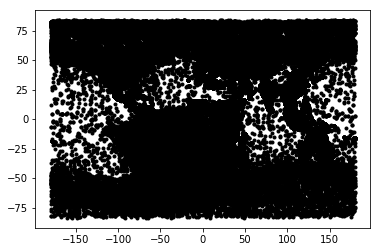

In [10]:
plt.plot(coords[:,1], coords[:,0], 'k.')
plt.show()

In [40]:
kms_per_radian = 6371.0088
epsilon = 1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [41]:
cluster_labels = db.labels_
len(set(cluster_labels))

4499

In [42]:
df['clusters'] = cluster_labels

In [43]:
sub_df = df[df['clusters'] != -1]

In [44]:
grouped_df = sub_df.groupby('clusters').agg({'frp': np.mean, 'lats': np.mean, 'lons': np.mean})

In [45]:
grouped_df.head()

,lons,frp,lats
clusters,,,
0,-69.604087,1.741030,-37.096988
1,-69.601632,3.836342,-37.031423
2,-69.605797,1.280999,-36.958449
3,-76.138300,0.692800,-2.498426
4,-76.636683,0.986184,-0.380427


In [46]:
sub_coords = grouped_df.as_matrix(columns=['lats', 'lons'])

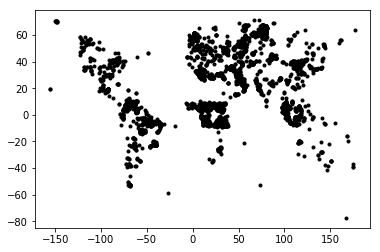

In [47]:
plt.plot(sub_coords[:,1], sub_coords[:,0], 'k.')
plt.show()